In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import statistics
import geopandas as gpd
from matplotlib import cm
from collections import OrderedDict

In [2]:
from sklearn.neighbors import NearestNeighbors 
from scipy.sparse import csr_matrix 
from sklearn.decomposition import TruncatedSVD 
import pandas as pd
from rake_nltk import Rake
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter

In [3]:
df = pd.read_csv('winemag-data-130k-v2.csv')

In [4]:
dfc = df.drop(['Unnamed: 0'], axis=1)

In [5]:
dfc

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [6]:
dfc.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [7]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [8]:
dfc['title'][0]

'Nicosia 2013 Vulkà Bianco  (Etna)'

In [9]:
[int(i) for i in dfc['title'][0].split() if i.isdigit()]

[2013]

In [10]:
#f = lambda x: [int(i) for i in x.split() if i.isdigit()]

In [11]:
dfc['year'] = df['title'].apply(lambda x: [int(i) for i in x.split() if i.isdigit()])

In [12]:
dfc

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,[2013]
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,[2011]
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,[2013]
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,[2013]
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,[2012]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),[2013]
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,[2004]
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,[2013]
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,[2012]


In [13]:
dfc['title'].value_counts().head(50)

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                                         11
Korbel NV Brut Sparkling (California)                                                           9
Segura Viudas NV Extra Dry Sparkling (Cava)                                                     8
Ruinart NV Brut Rosé  (Champagne)                                                               7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                                         7
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)                                            7
Jacquart NV Brut Mosaïque  (Champagne)                                                          6
Boizel NV Brut Réserve  (Champagne)                                                             6
Pierre Sparr NV Brut Réserve Sparkling (Crémant d'Alsace)                                       6
J Vineyards & Winery NV Brut Rosé Sparkling (Russian River Valley)                              6
Mumm Napa NV Brut Pr

In [14]:
dfc['title'].nunique()

118840

In [15]:
dfc['taster_name'].nunique()

19

In [16]:
dfc['taster_name'].value_counts()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [17]:
dfc['year'].max()

[18401, 2014]

In [18]:
dfc['year'].min()

[]

In [19]:
countries = df['country'].value_counts()

In [20]:
countries

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [21]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

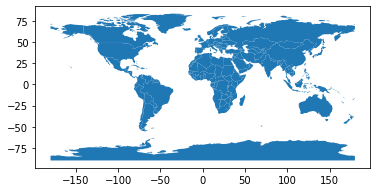

In [22]:
world.plot()

In [23]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [24]:
world['name'].tail(60)

117                Romania
118              Lithuania
119                 Latvia
120                Estonia
121                Germany
122               Bulgaria
123                 Greece
124                 Turkey
125                Albania
126                Croatia
127            Switzerland
128             Luxembourg
129                Belgium
130            Netherlands
131               Portugal
132                  Spain
133                Ireland
134          New Caledonia
135            Solomon Is.
136            New Zealand
137              Australia
138              Sri Lanka
139                  China
140                 Taiwan
141                  Italy
142                Denmark
143         United Kingdom
144                Iceland
145             Azerbaijan
146                Georgia
147            Philippines
148               Malaysia
149                 Brunei
150               Slovenia
151                Finland
152               Slovakia
153                Czechia
1

In [25]:
countries = countries.rename(index={'England': 'United Kingdom', 'US': 'United States of America', 'Bosnia and Herzegovina': 'Bosnia and Herz.'})

In [26]:
countries_join = world.set_index('name').join(countries)

In [27]:
#countries_join['country_log'] = countries_join['country']

In [28]:
countries_join

,pop_est,continent,iso_a3,gdp_md_est,geometry,country
name,,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",257.0
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",54504.0
...,...,...,...,...,...,...
Serbia,7111024,Europe,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",12.0
Montenegro,642550,Europe,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
Kosovo,1895250,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN


/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


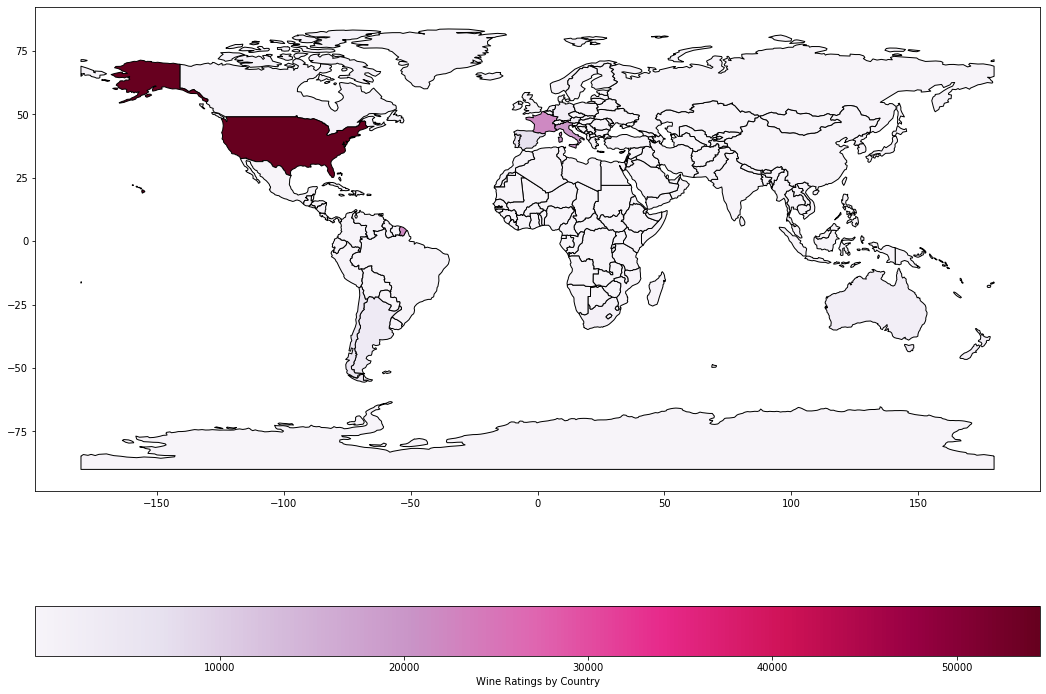

In [29]:
fig, ax = plt.subplots(figsize=(18, 14))

countries_join.plot(column='country',
            ax=ax,
            legend=True,
            cmap='PuRd',
            edgecolor='black',
            legend_kwds={"label": "Wine Ratings by Country",
                         "orientation": "horizontal"});

In [30]:
dfc['description'][0]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [31]:
r = Rake()

# extracting the words by passing the text
r.extract_keywords_from_text(dfc['description'][0])
key_words_dict_scores = r.get_word_degrees()
key_words_dict_scores

defaultdict(<function rake_nltk.rake.Rake._build_word_co_occurance_graph.<locals>.<lambda>()>,
            {'palate': 1,
             'dried': 7,
             'herb': 2,
             'broom': 1,
             'brimstone': 1,
             'citrus': 1,
             'sage': 5,
             'alongside': 5,
             'brisk': 5,
             'acidity': 5,
             'aromas': 4,
             'include': 4,
             'tropical': 4,
             'fruit': 4,
             'overly': 2,
             'expressive': 2,
             'offering': 3,
             'unripened': 3,
             'apple': 3})

In [32]:
r = Rake()    

def rake_implement(x,r):
    r.extract_keywords_from_text(x)
    return r.get_ranked_phrases()

dfc['key_words'] =dfc['description'].apply(lambda x: rake_implement(x,r))

In [33]:
#dfc['Key_Words'] = dfc['description'].apply(CountVectorizer().build_tokenizer())

In [34]:
dfc

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,key_words
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,[2013],"[dried sage alongside brisk acidity, aromas in..."
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,[2011],"[juicy red berry fruits, still structured, fir..."
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,[2013],"[green pineapple pokes, crisp acidity undersco..."
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,[2013],"[orange blossom start, mango giving way, sligh..."
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,[2012],"[pleasantly unfussy country wine, hearty winte..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),[2013],"[yet wraps, tart tangerine, light spätlese, in..."
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,[2004],"[secondary fruit compote highlights, coconut f..."
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,[2013],"[drained gravel soil gives, serious structure,..."
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,[2012],"[structure still developing, baked apple flavo..."


In [35]:
dfc['key_words'][0]

['dried sage alongside brisk acidity',
 'aromas include tropical fruit',
 'offering unripened apple',
 'dried herb',
 'overly expressive',
 'palate',
 'citrus',
 'broom',
 'brimstone']

In [36]:
dfc['key_words_join'] = dfc['key_words'].apply(lambda x: ', '.join([str(i) for i in x]))

In [37]:
#dfc

In [38]:
dfc['key_words_join'][0]

'dried sage alongside brisk acidity, aromas include tropical fruit, offering unripened apple, dried herb, overly expressive, palate, citrus, broom, brimstone'

In [39]:
dfc.iloc[0]

country                                                              Italy
description              Aromas include tropical fruit, broom, brimston...
designation                                                   Vulkà Bianco
points                                                                  87
price                                                                  NaN
province                                                 Sicily & Sardinia
region_1                                                              Etna
region_2                                                               NaN
taster_name                                                  Kerin O’Keefe
taster_twitter_handle                                         @kerinokeefe
title                                    Nicosia 2013 Vulkà Bianco  (Etna)
variety                                                        White Blend
winery                                                             Nicosia
year                     

In [40]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["alongside", "include", "offering", "already", "certainly", "although", "rather", "comes", "nonetheless"]
stop_words = stop_words.union(new_words)

In [41]:
lem = WordNetLemmatizer()
stem = PorterStemmer()
tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [42]:
def lemmatize_text(text):
    return [lem.lemmatize(w) for w in tokenizer.tokenize(text)]

def stem_text(text):
    return [stem.stem(w) for w in tokenizer.tokenize(text)]

In [43]:
dfc['key_words_lemmatized'] = dfc['key_words_join'].apply(lambda x: stem_text(x))

In [44]:
#dfc['key_words'] = dfc['key_words'].apply(lambda x: [stem.stem(word) for word in x])

In [45]:
#dfc['key_words'] = dfc['key_words'].apply(lambda x: [lem.lemmatize(word) for word in x])

In [46]:
dfc['key_words_lemmatized'][0]

['dri',
 'sage',
 'alongsid',
 'brisk',
 'acidity,',
 'aroma',
 'includ',
 'tropic',
 'fruit,',
 'offer',
 'unripen',
 'apple,',
 'dri',
 'herb,',
 'overli',
 'expressive,',
 'palate,',
 'citrus,',
 'broom,',
 'brimston']

In [49]:
dfc['key_words_str'] = dfc['key_words_lemmatized'].apply(lambda x: ', '.join([str(i) for i in x]))

In [55]:
# # instantiating and generating the count matrix
vectorize = CountVectorizer(stop_words=stop_words)
count_matrix = vectorize.fit_transform(dfc['key_words_str'])

In [56]:
len(vectorize.vocabulary_)

33299

In [ ]:
vectorize.vocabulary_

In [ ]:
sorted(vectorize.vocabulary_)

In [ ]:
# # generating the cosine similarity matrix
# cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [65]:
# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=1000)

In [66]:
# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(dfc['key_words_str'])

In [67]:
len(tfidf_vectorizer.vocabulary_)

2500

In [ ]:
#tfidf_matrix[:5]

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
cosine_sim

In [ ]:
#cosine_sim = [cosine_similarity(tfidf_matrix[i:i+10000],tfidf_matrix) for i in range(0, len(tfidf_matrix.todense()), 10000)]
    

In [ ]:
#cosine_sim.shape

In [ ]:
# # Compute and print the cosine similarity matrix
# cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
# cosine_sim

In [ ]:
#cosine_sim = tfidf_matrix * tfidf_matrix.T

In [ ]:
#tfidf_matrix.shape